In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import json
import os
import folium
import warnings
warnings.filterwarnings('ignore')

# from geopy.geocoders import Nominatim

In [2]:
import sys
import os

sys.path.insert(0, 'file/carnevale.ipynb')
from functions import haversine_distance,euclidean_distance,haversine_distance_normalized,euclidean_distance_normalized,custom_distance, find_csv_files, choose_dataset

In [3]:
dr = '/Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/'
dr_data = '/Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/'
#stops = pd.read_csv(dr+'gtfs/'+'stops.txt', sep=',')
#stops.rename(columns={"stop_id": "FERMATA","stop_name": "NOME_FERMATA", "stop_lat": "LATITUDE", "stop_lon": "LONGITUDE"}, inplace=True)
#cols = ['FERMATA','NOME_FERMATA','LATITUDE','LONGITUDE']
#stops = stops[cols]
#stops.to_csv(dr+'gtfs/'+ 'stops.csv',index=False)

#stops = pd.read_csv(dr+'gtfs/'+ 'stops.csv')
#print(f'stops.shape: {stops.shape}')
#stops

In [4]:
def find_csv_files(folder_path: str) -> list:
    """
        This function returns a list of all the csv files in the specified folder.
        :param folder_path: the path of the folder
        :return: a list of all the csv files in the specified folder
    """

    csv_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # File extension is .txt or .csv
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    # Sort the list of txt files in alphabetical order
    csv_files.sort()

    return csv_files

def choose_dataset(txt_files: list) -> str:
    """
        This function returns the path of the txt file chosen by the user.
        :param txt_files: the list of txt files
        :return: the path of the txt file chosen by the user
    """
    if not txt_files:
        print("No TXT file found.")
        return "None"
    if len(txt_files) == 1:
        print("The following file was found:")
    else:
        print("The following files were found:")
    for i, file_path in enumerate(txt_files):
        print(f"{i+1}. {file_path}")
    while True:
        choice = input("Enter the number corresponding to the dataset you wish to use (0 to exit): ")
        if not choice.isdigit():
            print("Enter a valid number.")
            continue
        choice = int(choice)
        if choice == 0:
            return "None"
        if choice < 1 or choice > len(txt_files):
            print("Enter a valid number.")
            continue
        return txt_files[choice - 1]
    

In [5]:
# Open the dataset that has also the geo coordinates
# Find all txt files in the data folder
csv_file = find_csv_files('/Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/')

print("Select a dataset with geo coordinates from the list:")

# Choose a dataset from the list of txt files
selected_dataset = choose_dataset(csv_file)

if selected_dataset:
    print(f"You selected the dataset {selected_dataset}")
else:
    print("No dataset selected.")

path  = selected_dataset

Select a dataset with geo coordinates from the list:
The following files were found:
1. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazioneCompleta.csv
2. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazioneCompleta_after.csv
3. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazioneCompleta_before.csv
4. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazioneCompleta_during.csv
5. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazionePasqua23_part1.csv
6. /Users/matteograzioso/Desktop/Università/Tirocinio/Tirocinio-Progetto-MASTER/data/processed/csvPuliti/dataset_cleaned_tempesportazionePa

In [6]:
dr_notebook = 'file/csvPuliti'
# dataset_compl = pd.read_csv(dr_data+'dataset_cleaned_tempesportazionePasqua23_part1.csv')

dataset_compl = pd.read_csv(path, header=0, sep=',')


print(f'dataset_compl.shape: {dataset_compl.shape}')
dataset_compl.head()

dataset_compl.shape: (4427619, 9)


,DATA,ORA,DATA_VALIDAZIONE,FERMATA,DESCRIZIONE,TICKET_CODE,DESCRIZIONE_TITOLO,LATITUDE,LONGITUDE
0,2022-05-13,00:00:00,2022-05-13 00:00:00,-2,Piazzale Roma,1,DAILY PASS VENEZIA - AVM,45.438038,12.318223
1,2022-05-13,00:00:00,2022-05-13 00:00:00,-2,Piazzale Roma,1,DAILY PASS VENEZIA - AVM,45.438038,12.318223
2,2022-05-13,00:00:00,2022-05-13 00:00:00,-2,Piazzale Roma,1,DAILY PASS VENEZIA - AVM,45.438038,12.318223
3,2022-05-13,00:00:00,2022-05-13 00:00:00,-2,Piazzale Roma,1,DAILY PASS VENEZIA - AVM,45.438038,12.318223
4,2022-05-13,00:01:00,2022-05-13 00:01:00,-2,Piazzale Roma,3,72H R.VENICE+AEROP.AR ONLINE,45.438038,12.318223


In [7]:
print(dataset_compl.dtypes)

DATA                   object
ORA                    object
DATA_VALIDAZIONE       object
FERMATA                 int64
DESCRIZIONE            object
TICKET_CODE             int64
DESCRIZIONE_TITOLO     object
LATITUDE              float64
LONGITUDE             float64
dtype: object


In [8]:
num_fermate = dataset_compl['FERMATA'].nunique()
print(f'Numero di fermate distinte: {num_fermate}')

Numero di fermate distinte: 127


In [9]:
#dataset_compl_isola_fermate = dataset_compl.copy()

#dataset_compl_isola_fermate = dataset_compl_isola_fermate[()]

In [10]:
dataset_compl['DATA_VALIDAZIONE'] = pd.to_datetime(dataset_compl['DATA_VALIDAZIONE'])
dataset_compl['DATA'] = pd.to_datetime(dataset_compl['DATA'])
#dataset_compl.dtypes

In [11]:
# Print the interval of dates for which we have data
print(f'Date range: {dataset_compl.DATA_VALIDAZIONE.min()} to {dataset_compl.DATA_VALIDAZIONE.max()}')

Date range: 2022-05-13 00:00:00 to 2022-07-15 05:13:00


In [12]:
dataset_clust = dataset_compl.copy()
#dataset_clust.drop(columns=['DATA', 'ORA','DESCRIZIONE_TITOLO'],inplace=True)
dataset_clust.drop(columns=['DESCRIZIONE_TITOLO'],inplace=True)
dataset_clust.head(3)

,DATA,ORA,DATA_VALIDAZIONE,FERMATA,DESCRIZIONE,TICKET_CODE,LATITUDE,LONGITUDE
0,2022-05-13,00:00:00,2022-05-13,-2,Piazzale Roma,1,45.438038,12.318223
1,2022-05-13,00:00:00,2022-05-13,-2,Piazzale Roma,1,45.438038,12.318223
2,2022-05-13,00:00:00,2022-05-13,-2,Piazzale Roma,1,45.438038,12.318223


In [13]:
print(dataset_clust.TICKET_CODE.unique())

[1 3 7 4 2 5]


In [17]:
# Change 5-STUD, 6-STUD to STUD in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['5-STUD', '6-STUD'], 'STUD')
# Change 5-WKRS, 6-WKRS to WKRS in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['5-WKRS', '6-WKRS'], 'WKRS')
# Change 5-RET, 6-RET to RET in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['5-RET', '6-RET'], 'RET')
# Change 5, 6 to LOC (that means locals) in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['5', '6'], 'LOC')
# Change 1, 2, 3, 4 to tuorist TUR in the dataframe
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].replace(['1', '2', '3', '4'], 'TUR')



# Print the unique ticket codes
# Print information about the changes made
print('The ticket codes 5-STUD and 6-STUD have been changed to STUD')
print('The ticket codes 5-WKRS and 6-WKRS have been changed to WKRS')
print('The ticket codes 5-RET and 6-RET have been changed to RET')
print('The ticket codes 5 and 6 have been changed to LOC')
print('The ticket codes 1, 2, 3 and 4 have been changed to TUR')

# Convert all the ticket codes to string
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].astype(str)

ticket_codes = dataset_clust['TICKET_CODE'].unique()
# Sort the ticket codes
ticket_codes.sort()

print('The considered ticket codes are: ', ticket_codes)

# Convert all the ticket codes to string
dataset_clust['TICKET_CODE'] = dataset_clust['TICKET_CODE'].astype(str)

The ticket codes 5-STUD and 6-STUD have been changed to STUD
The ticket codes 5-WKRS and 6-WKRS have been changed to WKRS
The ticket codes 5-RET and 6-RET have been changed to RET
The ticket codes 5 and 6 have been changed to LOC
The ticket codes 1, 2, 3 and 4 have been changed to TUR
The considered ticket codes are:  ['7' 'LOC' 'TUR']


In [18]:
num_fermate = dataset_clust['FERMATA'].nunique()
print(f'Numero di fermate distinte: {num_fermate}')

Numero di fermate distinte: 127


## Clustering in base ai ticket codes e rispetto alla vicinanza geografica delle celle

In [19]:
# Create a dataframe of stops
df_stop = dataset_clust.copy()
#df_stop = df_stop[['LATITUDE', 'LONGITUDE', 'CLUSTER','FERMATA']]
print(f'df_stop.shape: {df_stop.shape}')
df_stop.tail()

df_stop.shape: (4427619, 8)


,DATA,ORA,DATA_VALIDAZIONE,FERMATA,DESCRIZIONE,TICKET_CODE,LATITUDE,LONGITUDE
4427614,2022-07-14,09:59:00,2022-07-14 09:59:00,5098,Lido San Nic,TUR,45.424339,12.377113
4427615,2022-07-14,10:10:00,2022-07-14 10:10:00,5098,Lido San Nic,TUR,45.424339,12.377113
4427616,2022-07-14,10:51:00,2022-07-14 10:51:00,5098,Lido San Nic,7,45.424339,12.377113
4427617,2022-07-14,10:51:00,2022-07-14 10:51:00,5098,Lido San Nic,7,45.424339,12.377113
4427618,2022-07-14,20:47:00,2022-07-14 20:47:00,5011,San Marco-Sa,TUR,45.433456,12.342809


In [20]:
df_stop_count = df_stop.groupby(['LATITUDE', 'LONGITUDE', 'TICKET_CODE', 'FERMATA', 'DESCRIZIONE']).size().reset_index(name='COUNT')

print(f'df_stop_count.shape: {df_stop_count.shape}')
df_stop_count.head(10)

df_stop_count.shape: (256, 6)


,LATITUDE,LONGITUDE,TICKET_CODE,FERMATA,DESCRIZIONE,COUNT
0,45.223690,12.280678,7,5072,Chioggia Pia,786
1,45.223690,12.280678,TUR,5072,Chioggia Pia,6607
2,45.243614,12.294001,7,5017,Caroman,20
3,45.243614,12.294001,TUR,5017,Caroman,43
4,45.262791,12.299958,7,5073,Pellestrina,322
5,45.262791,12.299958,TUR,5073,Pellestrina,3149
6,45.332737,12.316975,7,5102,Santa Maria,356
7,45.332737,12.316975,TUR,5102,Santa Maria,829
8,45.341526,12.308979,7,5103,Alberoni Far,1032
9,45.341526,12.308979,TUR,5103,Alberoni Far,1328


In [21]:
# Describe the column COUNT
df_stop_count['COUNT'].describe()

count       256.000000
mean      17295.386719
std       34068.132391
min           1.000000
25%         152.000000
50%        2713.000000
75%       20927.500000
max      256904.000000
Name: COUNT, dtype: float64

In [22]:
df_stop_count.head(10)


,LATITUDE,LONGITUDE,TICKET_CODE,FERMATA,DESCRIZIONE,COUNT
0,45.223690,12.280678,7,5072,Chioggia Pia,786
1,45.223690,12.280678,TUR,5072,Chioggia Pia,6607
2,45.243614,12.294001,7,5017,Caroman,20
3,45.243614,12.294001,TUR,5017,Caroman,43
4,45.262791,12.299958,7,5073,Pellestrina,322
5,45.262791,12.299958,TUR,5073,Pellestrina,3149
6,45.332737,12.316975,7,5102,Santa Maria,356
7,45.332737,12.316975,TUR,5102,Santa Maria,829
8,45.341526,12.308979,7,5103,Alberoni Far,1032
9,45.341526,12.308979,TUR,5103,Alberoni Far,1328


In [23]:
# Pivot table for the ticket codes but maintaining the information about the stops
df_stop_count = df_stop_count.pivot_table(index=['LATITUDE', 'LONGITUDE', 'FERMATA', 'DESCRIZIONE'], columns='TICKET_CODE', values='COUNT', fill_value=0)
df_stop_count.reset_index(inplace=True)

# For each stop (LATITUDE, LONGITUDE), change the counter of each ticket code as a percentage of the total number of tickets
for row in range(len(df_stop_count)):
    total = df_stop_count.iloc[row, 4:].sum()
    for col in range(4, len(df_stop_count.columns)):
        df_stop_count.iloc[row, col] = df_stop_count.iloc[row, col] / total * 100

In [24]:
print(df_stop_count.at[0, 'TUR'])

89.368321385094


In [25]:
num_locations = len(df_stop_count)
print(f'num_locations: {num_locations}')
haversine_matrix = np.zeros((num_locations, num_locations))
euclidean_distances = np.zeros((num_locations, num_locations))

for i in range(num_locations):
    for j in range(i + 1, num_locations):
        coord1 = (df_stop_count.at[i, 'LATITUDE'], df_stop_count.at[i, 'LONGITUDE'])
        coord2 = (df_stop_count.at[j, 'LATITUDE'], df_stop_count.at[j, 'LONGITUDE'])
        distance = haversine_distance(coord1, coord2)
        haversine_matrix[i][j] = distance
        haversine_matrix[j][i] = distance  # Since distance is symmetric
        
        stops1 = [df_stop_count.at[i, 'TUR'],df_stop_count.at[i, '7'], df_stop_count.at[i, 'LOC']]
        stops2 = [df_stop_count.at[j, 'TUR'], df_stop_count.at[j, '7'], df_stop_count.at[j, 'LOC']]        
    
        stops1 = np.array(stops1)
        stops2 = np.array(stops2)

        euclidean_dist = euclidean_distance(stops1, stops2)
        euclidean_distances[i][j] = euclidean_dist
        euclidean_distances[j][i] = euclidean_dist  # Since distance is symmetric
        

# Create a DataFrame to store the haversine distances
haversine_df = pd.DataFrame(haversine_matrix, index=df_stop_count.index, columns=df_stop_count.index)

# Find the minimum and maximum haversine distances
min_distance = haversine_df.values.min()
max_distance = haversine_df.values.max()
avg_euclidean_distance = euclidean_distances.mean()


# Print the haversine distance DataFrame and the minimum and maximum distances
#print("Haversine Distance DataFrame:")
#print(haversine_df)

print("Minimum Haversine Distance:", min_distance, "km")
print("Maximum Haversine Distance:", max_distance, "km")


# Create a DataFrame to store the haversine distances
euclidean_df = pd.DataFrame(euclidean_distances, index=df_stop_count.index, columns=df_stop_count.index)

# Find the minimum and maximum Euclidean distances
min_euclidean_distance = euclidean_distances.min()
max_euclidean_distance = euclidean_distances.max()

# Print the haversine distance DataFrame and the minimum and maximum distances
#print("Haversine Distance DataFrame:")
#print(haversine_df)

# Now you have the normalized Euclidean distances in the range [0, 1]
print("Minimum Euclidean Distance:", min_euclidean_distance.min())
print("Maximum Euclidean Distance:", max_euclidean_distance.max())
print("Average Euclidean Distance:", avg_euclidean_distance/max_euclidean_distance)

num_locations: 127
Minimum Haversine Distance: 0.0 km
Maximum Haversine Distance: 32.907659114956466 km
Minimum Euclidean Distance: 0.0
Maximum Euclidean Distance: 138.2987334357602
Average Euclidean Distance: 0.3181755487758021


In [26]:
#min(min_euclidean_distance), max(max_euclidean_distance)
max_euclidean_distance

138.2987334357602

In [27]:
# From df_stop_count remove descrizione
df_stop_count_data = df_stop_count.copy()
df_stop_count_data = df_stop_count_data.drop(columns=['FERMATA','DESCRIZIONE'])

data = df_stop_count_data.values
print(data.shape)
data[0]

(127, 5)


array([45.22369   , 12.280678  , 10.63167861,  0.        , 89.36832139])

In [28]:
#stop 1: 5102.0, stop2: 5103.0, combined_distance: 0.0396467042622267
#stop 1: 5102.0, stop2: -5.0, combined_distance: 0.22699456069457805
#stop 1: 5102.0, stop2: -2.0, combined_distance: 0.34764672602143193

#stop 1: 5050.0, stop2: 5049.0, combined_distance: 0.0017922304598963794 --> stesso cluster

coord_weight: 0.4, similarity_weight: 0.6


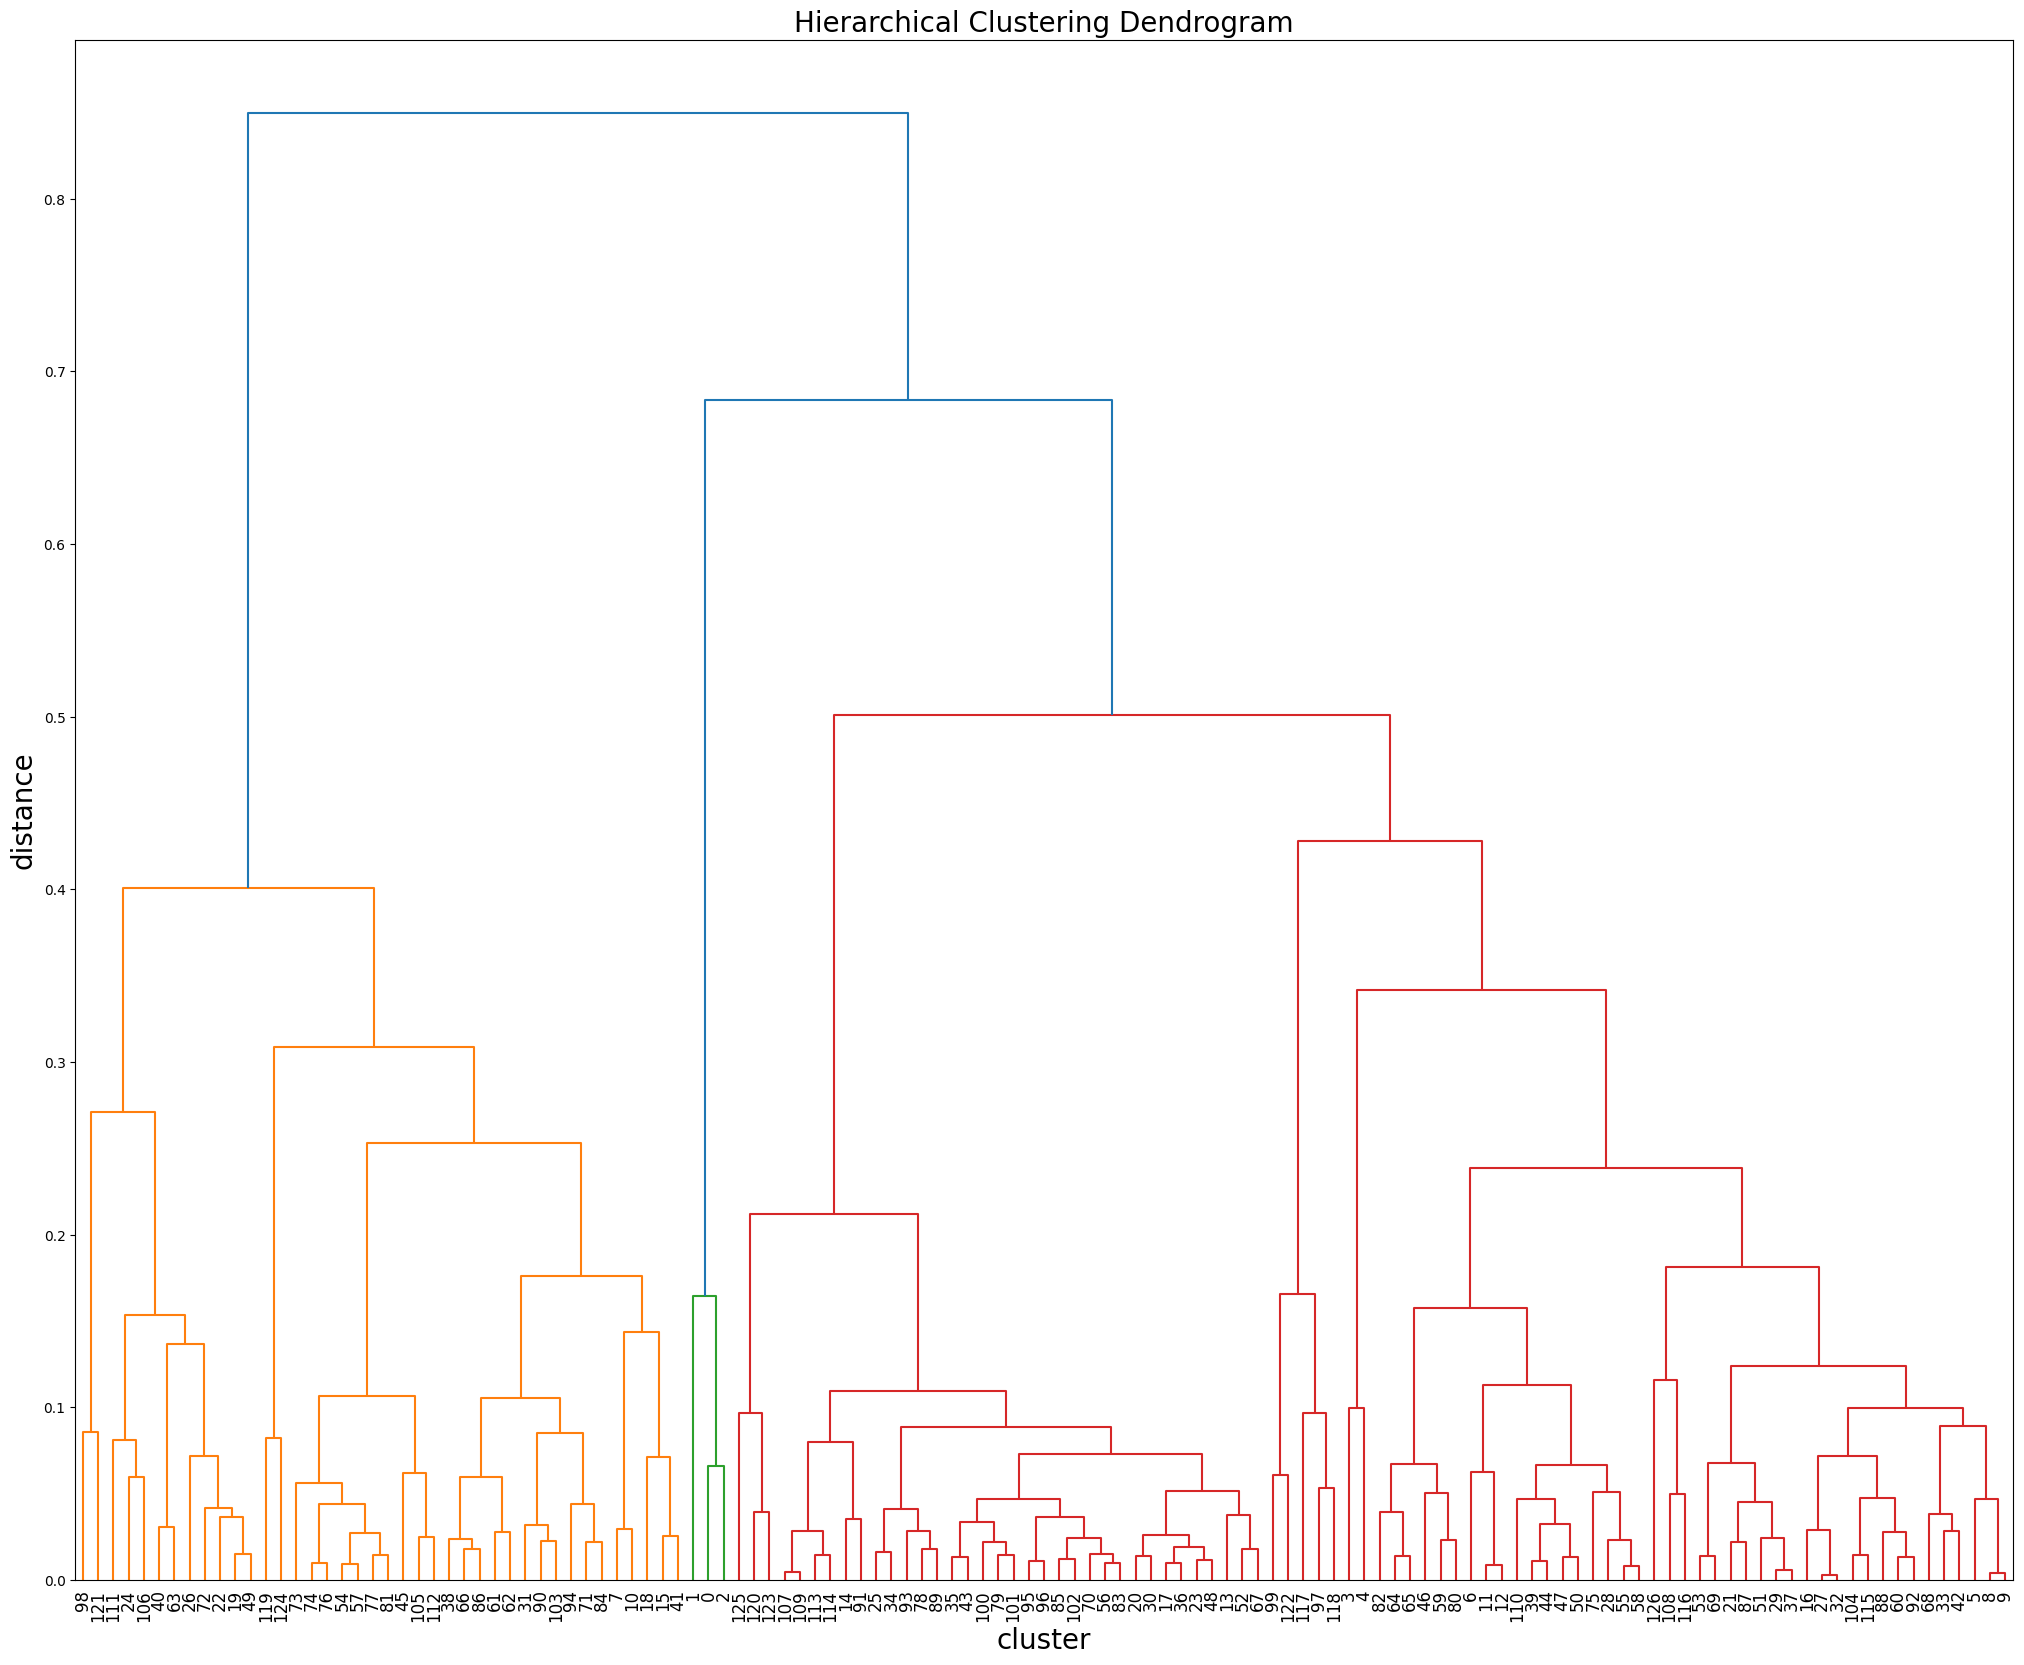

In [29]:
# Custom distance function parameters
coord_weight = 0.4
# coord_weight = 0
similarity_weight = 1-coord_weight
print(f'coord_weight: {coord_weight}, similarity_weight: {similarity_weight}')

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Calculate linkage matrix using custom distance function
# The custom distance function is a weighted average of the haversine distance between coordinates and 
# the similarity between the stop counts
linkage_matrix = linkage(data, method='complete', 
                         metric=lambda x, y: custom_distance(x, y, coord_weight, similarity_weight,min_distance,
                                                             max_distance,min_euclidean_distance,
                                                             max_euclidean_distance))



# calculate full dendrogram
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('cluster', fontsize=20)
plt.ylabel('distance', fontsize=20)
# Create a dendrogram for visualization purposes 
dendrogram(linkage_matrix, #truncate_mode='lastp', #p=12, 
           #orientation="right",
           leaf_rotation=90., leaf_font_size=12.)#, show_contracted=True)
plt.show()

In [30]:
#df_stop_count[(df_stop_count['FERMATA']==5103) | (df_stop_count['FERMATA']==-2)]
#stop 1: 5103.0, stop2: -2.0, combined_distance: 36.09851949056943

In [31]:
# 5097 torcello
# 5072 verso chioggia 
# -2 piazzale roma

#dataset_time_slots[dataset_time_slots['FERMATA'] == -5]

### threshold

In [32]:
# Determine clusters based on a desired threshold or number of clusters
threshold = 0.1
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance', depth=2, R=None, monocrit=None)
# print(clusters)

In [33]:
#min_hd = min(haversine_distance_arr)
#max_hd = max(haversine_distance_arr)
#avg_hd = np.average(haversine_distance_arr)

#min_ed = min(eu_similarity_arr)
#max_ed = max(eu_similarity_arr)
#avg_ed = np.average(eu_similarity_arr)

#print(f'min_hd: {min_hd}, max_hd: {max_hd}, avg_hd: {avg_hd}')
#print(f'min_ed: {min_ed}, max_ed: {max_ed}, avg_ed: {avg_ed}')

In [34]:
#print(0.7*0.16)
#print(0.3*0.23)

In [35]:
# Adding cluster labels to the stop count dataframe
df_stop_count['CLUSTER'] = clusters
print(df_stop_count.shape)
df_stop_count.head()

(127, 8)


TICKET_CODE,LATITUDE,LONGITUDE,FERMATA,DESCRIZIONE,7,LOC,TUR,CLUSTER
0,45.223690,12.280678,5072,Chioggia Pia,10.631679,0.0,89.368321,12
1,45.243614,12.294001,5017,Caroman,31.746032,0.0,68.253968,13
2,45.262791,12.299958,5073,Pellestrina,9.276865,0.0,90.723135,12
3,45.332737,12.316975,5102,Santa Maria,30.042194,0.0,69.957806,19
4,45.341526,12.308979,5103,Alberoni Far,43.728814,0.0,56.271186,19


In [36]:
#df_stop_count[df_stop_count['CLUSTER']==3]

In [37]:
cols_cl = ['FERMATA','CLUSTER']
df_cl = df_stop_count.copy()
df_cl = df_cl[cols_cl]

dataset_compl = dataset_compl.merge(df_cl, on=['FERMATA'])

df_sum_validations = dataset_compl.copy()
df_sum_validations = dataset_compl.groupby(['CLUSTER']).size().reset_index()
df_sum_validations.rename(columns={0: 'n_V'},inplace=True)
df_sum_validations.head(3)

,CLUSTER,n_V
0,1,506
1,2,427
2,3,11


In [38]:
if 'DESCRIZIONE' not in df_stop_count.columns :
    df_stop_count = df_stop_count.merge(fermate, on=['LATITUDE','LONGITUDE','FERMATA'])
#df_stop_count

In [39]:
# get hex codes of tab_20 palette in the format 1:hex_code dict
cluster_colors = dict(zip(range(1,51), sns.color_palette("tab20", 50).as_hex()))
#cluster_colors

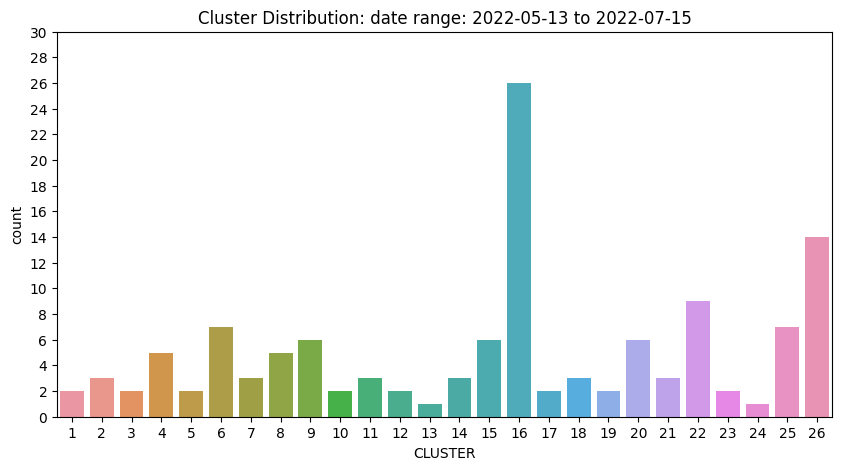

In [40]:
# Countplot of cluster distribution 
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='CLUSTER', data=df_stop_count)#, palette=cluster_colors)
plt.yticks(np.arange(0, max(df_stop_count['CLUSTER'].value_counts()) + 5, 2))
plt.title('Cluster Distribution: ' + 'date range: ' + str(df_stop['DATA'].min().date()) + ' to ' 
          + str(df_stop['DATA'].max().date()))
plt.show()

In [41]:
grouped = df_stop_count.copy()
cols_grouped = ['CLUSTER', 'TUR', '7', 'LOC']
grouped = grouped[cols_grouped]
grouped.reset_index(inplace=True,drop=True)
grouped = grouped.rename_axis(None, axis=1)

In [42]:
grouped_mean = grouped.groupby(['CLUSTER']).mean()
grouped_mean.reset_index(inplace=True)
grouped_mean

,CLUSTER,TUR,7,LOC
0,1,17.601509,82.398491,0.000000
1,2,10.160616,89.839384,0.000000
2,3,0.000000,100.000000,0.000000
3,4,14.946428,85.053572,0.000000
4,5,33.181677,66.818323,0.000000
5,6,46.162886,53.837114,0.000000
6,7,41.721545,58.278455,0.000000
7,8,22.840044,77.073932,0.086024
8,9,31.962986,68.037014,0.000000
9,10,35.666667,64.333333,0.000000


In [43]:
# è la standard deviation: se vuoi la varianza togli sqrt
grouped_var = grouped.groupby(['CLUSTER']).apply(lambda x: np.sqrt(np.var(x)))
grouped_var.drop(columns=['CLUSTER'],inplace = True)
grouped_var.reset_index(inplace=True)

In [44]:
grouped = grouped_mean.merge(grouped_var, on=['CLUSTER'])
grouped = grouped.fillna(0)

In [45]:
grouped = grouped.round(decimals = 3)
grouped

,CLUSTER,TUR_x,7_x,LOC_x,TUR_y,7_y,LOC_y
0,1,17.602,82.398,0.000,2.548,2.548,0.000
1,2,10.161,89.839,0.000,2.566,2.566,0.000
2,3,0.000,100.000,0.000,0.000,0.000,0.000
3,4,14.946,85.054,0.000,2.414,2.414,0.000
4,5,33.182,66.818,0.000,5.178,5.178,0.000
5,6,46.163,53.837,0.000,2.073,2.073,0.000
6,7,41.722,58.278,0.000,2.472,2.472,0.000
7,8,22.840,77.074,0.086,2.066,2.193,0.172
8,9,31.963,68.037,0.000,2.736,2.736,0.000
9,10,35.667,64.333,0.000,2.333,2.333,0.000


In [46]:
# List of ticket codes: 1, 2, 3, 4, 7, LOC, RET, STUD, WKRS
list_tc = ['TUR', '7', 'LOC']
for i in list_tc:
    col_mean = str(i) + '_x'
    col_var = str(i) + '_y'
    col_ts = 'Mean_Var_' + str(i)
    grouped[col_ts] = grouped[col_mean].astype(str) + ' ± ' + grouped[col_var].apply(lambda x: f'{x:.2f}')

In [47]:
# See all columns of the dataframe
pd.set_option('display.max_columns', None)

In [48]:
print(grouped.shape)
grouped.head()

(26, 10)


,CLUSTER,TUR_x,7_x,LOC_x,TUR_y,7_y,LOC_y,Mean_Var_TUR,Mean_Var_7,Mean_Var_LOC
0,1,17.602,82.398,0.0,2.548,2.548,0.0,17.602 ± 2.55,82.398 ± 2.55,0.0 ± 0.00
1,2,10.161,89.839,0.0,2.566,2.566,0.0,10.161 ± 2.57,89.839 ± 2.57,0.0 ± 0.00
2,3,0.000,100.000,0.0,0.000,0.000,0.0,0.0 ± 0.00,100.0 ± 0.00,0.0 ± 0.00
3,4,14.946,85.054,0.0,2.414,2.414,0.0,14.946 ± 2.41,85.054 ± 2.41,0.0 ± 0.00
4,5,33.182,66.818,0.0,5.178,5.178,0.0,33.182 ± 5.18,66.818 ± 5.18,0.0 ± 0.00


In [49]:
cl_final = ['CLUSTER','Mean_Var_TUR','Mean_Var_7','Mean_Var_LOC']
grouped = grouped[cl_final]
grouped = grouped.merge(df_sum_validations, on=['CLUSTER'])

In [50]:
# Group by CLUSTER and aggregate the 'DESCRIZIONE' column into a list
clustered_stops = df_stop_count.groupby('CLUSTER')['DESCRIZIONE'].agg(['count', list]).reset_index()
clustered_stops = clustered_stops.merge(grouped, on = ['CLUSTER'])
#for i in range(6) : 
#    clustered_stops[i] = clustered_stops[i].round(decimals = 3)
#clustered_stops.sort_values(by=[0,1,2,3,4,5])
clustered_stops.rename(columns={'count': 'n_F', 'list': 'STOPS'},inplace=True)
clustered_cols = ['CLUSTER', 'n_F', 'n_V', 'Mean_Var_TUR', 'Mean_Var_7', 'Mean_Var_LOC', 'STOPS']
clustered_stops = clustered_stops[clustered_cols]
clustered_stops

,CLUSTER,n_F,n_V,Mean_Var_TUR,Mean_Var_7,Mean_Var_LOC,STOPS
0,1,2,506,17.602 ± 2.55,82.398 ± 2.55,0.0 ± 0.00,"[Punta Sabbio, BURANO ""B""]"
1,2,3,427,10.161 ± 2.57,89.839 ± 2.57,0.0 ± 0.00,"[GIARDINI BIE, MURANO FARO, Lazzaretto N]"
2,3,2,11,0.0 ± 0.00,100.0 ± 0.00,0.0 ± 0.00,"[San Marco Va, P.le Roma ""A]"
3,4,5,944,14.946 ± 2.41,85.054 ± 2.41,0.0 ± 0.00,"[Zitelle, Giudecca Pal, Sacca Fisola, San Marc..."
4,5,2,390144,33.182 ± 5.18,66.818 ± 5.18,0.0 ± 0.00,"[Stazione Mestre, TERRA]"
5,6,7,117006,46.163 ± 2.07,53.837 ± 2.07,0.0 ± 0.00,"[San Toma', Rialto ""A"", Ferrovia ""E"", Tronchet..."
6,7,3,571,41.722 ± 2.47,58.278 ± 2.47,0.0 ± 0.00,"[San Marco-Sa, MURANO COLON, Murano Museo]"
7,8,5,344843,22.84 ± 2.07,77.074 ± 2.19,0.086 ± 0.17,"[ACCADEMIA ""A, Tronchetto F, Piazzale Roma, P...."
8,9,6,971,31.963 ± 2.74,68.037 ± 2.74,0.0 ± 0.00,"[GIARDINI ""A"", P.le Roma ""D, Riva de Bias, F.t..."
9,10,2,62,35.667 ± 2.33,64.333 ± 2.33,0.0 ± 0.00,"[LIDO S.M.E. , LIDO S.M.E. ]"


In [51]:
# #df_stop_count[df_stop_count['CLUSTER']==21]
# grouped = df_stop_count.copy()
# cols_grouped = ['CLUSTER', '1', '2', '3', '4', '7', 'LOC', 'RET', 'STUD', 'WKRS']
# grouped = grouped[cols_grouped]
# grouped.reset_index(inplace=True,drop=True)
# grouped = grouped.rename_axis(None, axis=1)
# #grouped

# grouped_mean = grouped.groupby(['CLUSTER']).mean()
# grouped_mean.reset_index(inplace=True)
# grouped_mean

# # è la standard deviation: se vuoi la varianza togli sqrt
# grouped_var = grouped.groupby(['CLUSTER']).apply(lambda x: np.sqrt(np.var(x)))
# grouped_var.drop(columns=['CLUSTER'],inplace = True)
# grouped_var.reset_index(inplace=True)

# grouped = grouped_mean.merge(grouped_var, on=['CLUSTER'])
# grouped = grouped.fillna(0)
# #grouped

# grouped = grouped.round(decimals = 3)
# grouped
# grouped

# for i in range(6) :  
#     col_mean = str(i) + '_x'
#     col_var = str(i) + '_y'
#     col_ts = 'Mean_Var_' + str(i)
#     grouped[col_ts] = grouped[col_mean].astype(str) + ' ± ' + grouped[col_var].apply(lambda x: f'{x:.2f}')

# cl_final = ['CLUSTER','Mean_Var_0','Mean_Var_1','Mean_Var_2','Mean_Var_3','Mean_Var_4','Mean_Var_5']
# grouped = grouped[cl_final]

# #grouped

# # Group by CLUSTER and aggregate the 'DESCRIZIONE' column into a list
# clustered_stops = df_stop_count.groupby('CLUSTER')['DESCRIZIONE'].agg(['count', list]).reset_index()
# clustered_stops = clustered_stops.merge(grouped, on = ['CLUSTER'])
# #for i in range(6) : 
# #    clustered_stops[i] = clustered_stops[i].round(decimals = 3)
# #clustered_stops.sort_values(by=[0,1,2,3,4,5])
# clustered_stops.rename(columns={'count': 'NUM', 'list': 'STOPS'},inplace=True)
# clustered_cols = ['CLUSTER', 'NUM', 'Mean_Var_0', 'Mean_Var_1', 'Mean_Var_2','Mean_Var_3', 'Mean_Var_4',
#                   'Mean_Var_5','STOPS']
# clustered_stops = clustered_stops[clustered_cols]
# clustered_stops

In [52]:
# Create a folium map centered around the mean latitude and longitude
center_lat = np.mean(df_stop_count['LATITUDE'])
center_lon = np.mean(df_stop_count['LONGITUDE'])
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create markers for each stop and color them based on clusters
for idx, row in df_stop_count.iterrows():
    # Retrieve Cluster id and set it as a integer
    cluster = int(row['CLUSTER'])

    cluster_color = cluster_colors.get(cluster, 'gray')  # Default to gray if cluster color is not defined
    #print(cluster_color)

    # cluster_color = cluster_
    # colors.get(cluster, 'gray')  # Default to gray if cluster color is not defined
    # Add a label to the marker with the name of the stop contained in the column 'DESCRIZIONE'
    # Retrieve the name of the stop from the column 'DESCRIZIONE' of the dataframe df matching the FERMATA
    location = df_stop_count[df_stop_count['FERMATA'] == row['FERMATA']]['DESCRIZIONE'].values[0]
    # Retrieve FERMATA id and set it as a integer
    fermata = int(row['FERMATA'])
    # Retrieve the total number of validations for the stop
    tot_validations = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'n_V'].iloc[0]
    # Retrieve the total number of stops for the stop
    tot_stops = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'n_F'].iloc[0]
    # Retrieve Cluster id and set it as a integer
    cluster = int(row['CLUSTER'])

    # Retrieve the mean and standard deviation of the stop counts for the cluster
    mean_tur = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_TUR'].iloc[0]
    mean_7 = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_7'].iloc[0]
    mean_loc = clustered_stops.loc[clustered_stops['CLUSTER'] == cluster, 'Mean_Var_LOC'].iloc[0]
    # Create a string for popup message containing the name of the stop, FERMATA and the cluster in BOLD
    #popup_message = f"<b><i>{location}</i></b><br><br><u>Fermata:</u> {fermata}<br><u>Cluster:</u> {cluster}<br><u>Mean and sd:</u> {mean_0}<br>"
    popup=folium.Popup(f"<b><i>{location}</i></b><br><br><u>Fermata:</u> {fermata}<br><u>Cluster:</u> {cluster}<br><u>Tot stops:</u> {tot_stops}<br><u>Tot validations:</u> {tot_validations}<br><u>Mean and sd:</u> <i>Mean Tourists:</i>{mean_tur},<i>Mean 75 minutes:</i> {mean_7}, <i>Mean Locals:</i> {mean_loc}<br>", max_width=300, min_width=300)


    # Add a marker to the map with the popup message and the color of the cluster
    # folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=popup_message, icon=folium.Icon(color=cluster_color)).add_to(m)
    # Add a marker to the map with the popup message and the color of the cluster
    # folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=popup_message, icon=folium.Icon(color=cluster_color)).add_to(m)
    if fermata < 0:
        folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=popup, 
                      icon=folium.Icon(color='white', icon_color=cluster_color, icon='bus', prefix='fa')).add_to(m)
    else:
        folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=popup, 
                      icon=folium.Icon(color='white', icon_color=cluster_color, icon='ship', prefix='fa')).add_to(m)

# Add layer control and show map
#m.add_child(folium.LayerControl(collapsed=False))
m

In [53]:
# print the number of unique values of the column 'FERMATA'
print('Number of unique values of the column FERMATA: {}'.format(df_stop_count['FERMATA'].nunique()))
# print the numer of clusters
print('Number of clusters: {}'.format(df_stop_count['CLUSTER'].nunique()))
# Print the average number of stops per cluster
print('Average number of stops per cluster: {}'.format(df_stop_count['CLUSTER'].value_counts().mean()))

Number of unique values of the column FERMATA: 127
Number of clusters: 26
Average number of stops per cluster: 4.884615384615385


In [54]:
# Export the map to an HTML file

th = str(threshold)
th = th.replace('.', '')
print(f'threshold: {th}')
num_cl = str(df_stop_count.CLUSTER.max())
print(f'number of clusters: {num_cl}')

file_name = 'estate22'
dr_map = 'Documenti/risultati clustering/nuovo_13Sett_TURISTI_UNITI/' + file_name + '/'
#time = datetime.now().strftime("%Y%m%d-%H%M%S")
try:
    m.save(dr+dr_map + file_name + '_threshold_' + th + '_' + num_cl + 'cluster' +'.html')
except:
    # Create a new folder in map folder
    os.mkdir(dr+dr_map + file_name)
    m.save(dr+dr_map + file_name + '_threshold_' + th + '_' + num_cl + 'cluster' +'.html')

threshold: 01
number of clusters: 26


In [55]:
# For each Cluster id, print the number of stops in that cluster, the FERMATA id and the name of the stop
df_stop_count_copy = df_stop_count.copy()
# To df_stop_count add a column with the name of the stop matching the FERMATA
#df_stop_count_copy['DESCRIZIONE'] = df_stop_count_copy['FERMATA'].
#apply(lambda x: df[df['FERMATA'] == x]['DESCRIZIONE'].values[0])

# Consider only the columns ['Cluster', 'FERMATA', 'DESCRIZIONE']
df_stop_count_copy = df_stop_count_copy[['CLUSTER', 'FERMATA', 'DESCRIZIONE']]
df_stop_count_copy.columns.name = None

#df_stop_count_copy.groupby(['CLUSTER'])
#df_stop_count_copy = df_stop_count_copy.set_index(['CLUSTER','FERMATA'])
df_stop_count_copy


print('Number of clusters: ', max(df_stop_count_copy['CLUSTER']))
print('\n')
for cluster in range(1, max(df_stop_count_copy['CLUSTER']) + 1):
    print(f"CLUSTER {cluster} contains {len(df_stop_count_copy[df_stop_count_copy['CLUSTER'] == cluster])} stops.")
    print(df_stop_count_copy[df_stop_count_copy['CLUSTER'] == cluster][['FERMATA', 'DESCRIZIONE']])
    print('\n')

Number of clusters:  26


CLUSTER 1 contains 2 stops.
     FERMATA   DESCRIZIONE
98      5108  Punta Sabbio
121     5068    BURANO "B"


CLUSTER 2 contains 3 stops.
     FERMATA   DESCRIZIONE
24      5128  GIARDINI BIE
106     5095   MURANO FARO
111     5610  Lazzaretto N


CLUSTER 3 contains 2 stops.
    FERMATA   DESCRIZIONE
40     5054  San Marco Va
63     5112  P.le Roma "A


CLUSTER 4 contains 5 stops.
    FERMATA   DESCRIZIONE
19     5118       Zitelle
22     5129  Giudecca Pal
26     5023  Sacca Fisola
49     5012  San Marco-Sa
72     5027  P.le Roma "C


CLUSTER 5 contains 2 stops.
     FERMATA      DESCRIZIONE
119       -3  Stazione Mestre
124       -1            TERRA


CLUSTER 6 contains 7 stops.
    FERMATA   DESCRIZIONE
54     5044     San Toma'
57     5166    Rialto "A"
73     5191  Ferrovia "E"
74     5024    Tronchetto
76     5025    Tronchetto
77     5088  FERROVIA "C"
81     5033  FERROVIA "A"


CLUSTER 7 contains 3 stops.
     FERMATA   DESCRIZIONE
45      5014  San 

In [56]:
#controlliamo un cluster 
df_stop_count[df_stop_count['CLUSTER']==6]

TICKET_CODE,LATITUDE,LONGITUDE,FERMATA,DESCRIZIONE,7,LOC,TUR,CLUSTER
54,45.435249,12.328128,5044,San Toma',54.523077,0.0,45.476923,6
57,45.436981,12.334541,5166,"Rialto ""A""",54.545455,0.0,45.454545,6
73,45.439873,12.320880,5191,"Ferrovia ""E""",49.107264,0.0,50.892736,6
74,45.440094,12.306348,5024,Tronchetto,55.082427,0.0,44.917573,6
76,45.440308,12.306533,5025,Tronchetto,53.571429,0.0,46.428571,6
77,45.440372,12.321408,5088,"FERROVIA ""C""",53.932584,0.0,46.067416,6
81,45.441017,12.322206,5033,"FERROVIA ""A""",56.097561,0.0,43.902439,6


In [57]:
#dataset_compl[dataset_compl['FERMATA']==5090]